<div id="colab_button">
  <h1>Under the hood</h1>
  <a target="_blank" href="https://colab.research.google.com/github/mithril-security/blindbox/blob/main/docs/docs/getting-started/under-the-hood.ipynb"> 
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</div>

> ⚠️ This guide is a direct follow up of the [Quick tour](https://blindbox.mithrilsecurity.io/en/latest/docs/getting-started/quick-tour/). If you haven't read it, you should do that first [⏭️](https://blindbox.mithrilsecurity.io/en/latest/docs/getting-started/quick-tour/) 

In the Quick tour, we saw how we can use the built-in API to query the Whisper model, while protecting data during computation with a Nitro enclave environment.

Let's take a look at what is going on under the hood when we use the Whisper API, because this will all be informative as to BlindBox's future workflow.

## Nitro Enclave server
__________________

When you use our default BlindBox Whisper API, you connect to the **BlindBox Nitro server hosted by Mithril Security**. 

Nitro Enclaves are an **AWS technology** and can be deployed on **Amazon EC2 instances only** (ours is on an [Amazon EC2 R6i Instance](https://aws.amazon.com/ec2/instance-types/r6i/)).

The advantage of this is that it allows **you to test** our APIs **for free** and **without spending any time on deployment**. But if you want to deploy your own BlindBox API server for Nitro enclaves, we made a guide explaining how to do it [here](../how-to-guides/deploy-API-server.ipynb).

### Configuration

Let's take a look at how our Nitro server is configured:

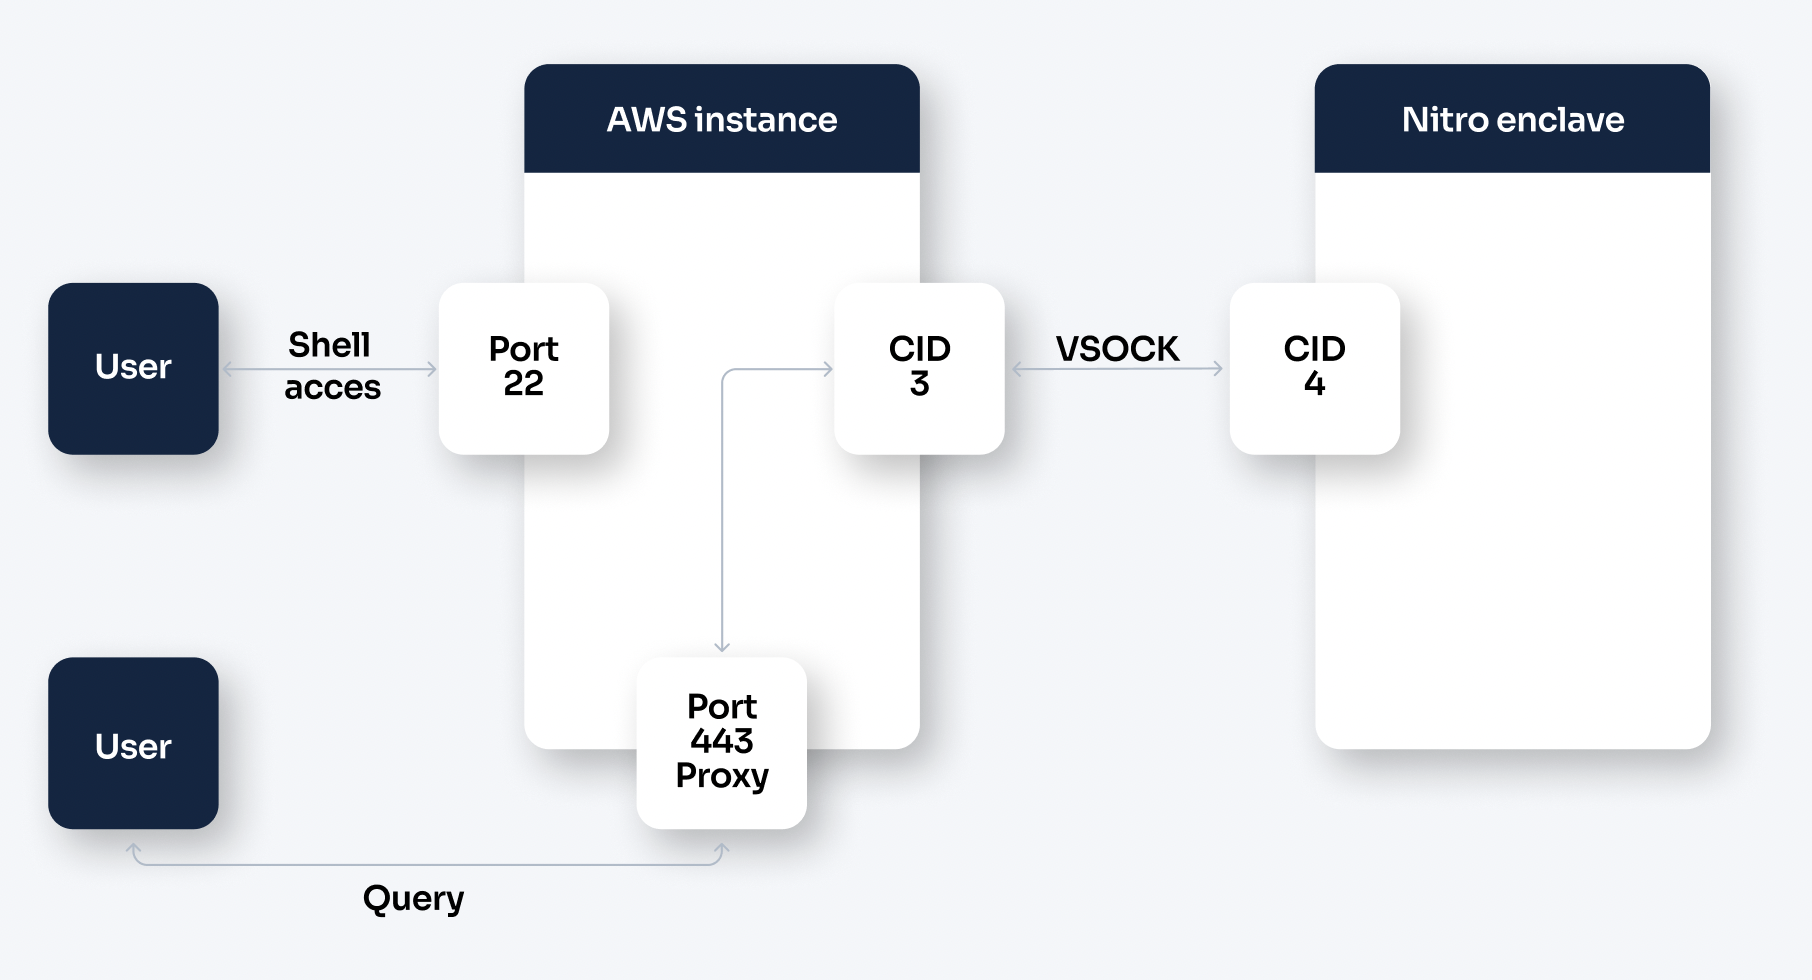

+ Queries are sent to our AWS instance on port 443 as HTTP requests.
+ They are then redirected to our enclave via the VSOCK channel.
+ The enclave handles the requests.
+ The results are returned via the VSOCK channel.

## Attestation
________________________

When we call the `transcribe()` method in the BlindBox Whisper API, the first thing we are going to do is create a `BlindAI Connection` object using the `blindai.core.connect()` method.

***# ok by this point, we have entirely forgotten the transcribe method XD I think we need to put the code again***

In [ ]:
!pip install blindbox

#  connect to your server instance
BLINDAI_NITRO_SERVER = "44.228.153.183"

client = blindai.core.connect(
    addr=BLINDAI_NITRO_SERVER
)

***# would it be possible to condense this and somehow put it as comments in the code?***

All this means is that we are going to establish a connection with our server instance, verify this server instance and then keep a track of this connection for following queries.

This `connect()` method is where we will perform attestation, the process of verifying the enclave application code, OS and settings, before allowing any data to be sent to the enclave. For more details about attestation, check out our Nitro attestation section in our [how we protect your data guide](./confidential_computing.md).

If we were to attempt to connect with an enclave running a modified version of the BlindBox API or a misconfigured enclave, we would see the following error:

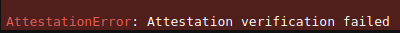

## Querying the Whisper model
____________________________

When we **query** the Whisper model on our Mithril Nitro enclave server, we are **sending a request** to our **verified Nitro enclave** using a **secure TLS communication channel**. We use the `.text` attribute to specify that we want to get our results back in a string format.

***# Same: wouldn't it make more sense to get rid of some of the text and actually put that into comments in the code?***

The **computation** performed to get the result is **performed within the Nitro enclave** and the audio file and results are **never accessible to anyone outside** of the enclave.

In [ ]:
!pip install requests

import requests

res = requests.post(
    "https://nitro.mithrilsecurity.io/whisper/predict",
    files={
        "audio": open("test2.wav", "rb"),
    },
).text

print(res)

## Conclusions
_________________

In this guide, we have:

+ Seen how the Mithril **Nitro server is set-up**. 
+ Discussed how **attestation protects** your data. 
+ Discovered how **queries are performed** under the hood. 